<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Dog_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 27.3 MB/s 
     |████████████████████████████████| 187 kB 71.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.9 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 561 kB 72.7 MB/s 
     |████████████████████████████████| 51 kB 355 kB/s 
     |████████████████████████████████| 130 kB 73.6 MB/s 


In [2]:
import fastbook

In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
!pip install utils

In [5]:
from fastai.vision.all import *
from utils import *

In [6]:
path = untar_data(URLs.PETS)

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
images = (path/'images').ls()

In [9]:
images

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_31.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_13.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_109.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_159.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_233.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_199.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_105.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_51.jpg')...]

In [10]:
fnname = images[0]

In [11]:
fnname

Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_31.jpg')

In [12]:
file = (path/'images').ls()

In [13]:
fname = file[0]

In [14]:
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_31.jpg')

In [15]:
#re.findall(r'(.+)_\d+.jpg$', fname)

In [16]:
pets = DataBlock(blocks = (ImageBlock,CategoryBlock),
                 get_items =get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms=Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale=0.75),
                 )
dls = pets.dataloaders(path/'images')

Presizing is a way of doing image augmentation that is designed to minimize data destruction while maintaining good performance

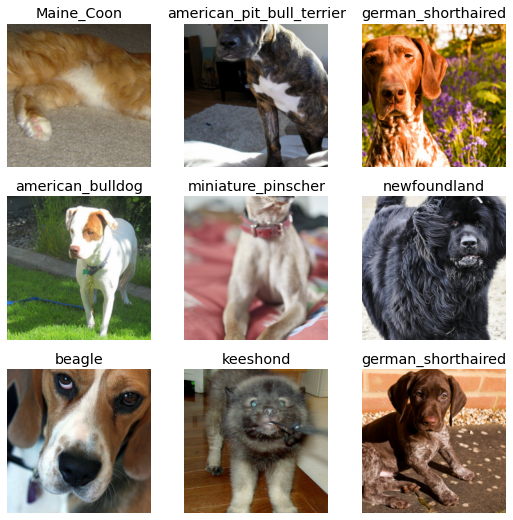

In [17]:
dls.show_batch()

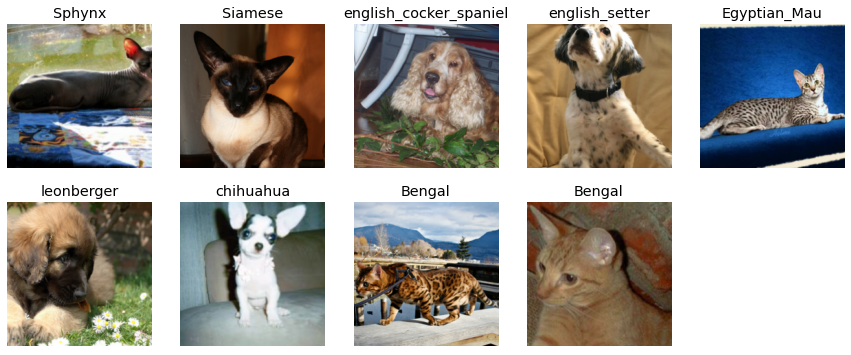

In [18]:
dls.show_batch(nrows=2, ncols =5)

In [19]:
pet1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42), 
                 get_y = using_attr(RegexLabeller("(.+)_\d+.jpg$"), "name"),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))
dls = pet1.dataloaders(path/"images")

In [20]:
#We use a summary method
pet1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_70.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_70.jpg
    applying partial gives
      great_pyrenees
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(21)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(21))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting u

In [21]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.527666,0.318507,0.103518,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.510403,0.309104,0.094046,01:14
1,0.304912,0.213672,0.069689,01:23


In [22]:
x,y = dls.one_batch()

In [23]:
x

TensorImage([[[[-1.3278, -1.3939, -1.3045,  ..., -1.4449, -1.3990, -1.3965],
          [-1.2806, -1.3699, -1.3133,  ..., -1.4281, -1.4374, -1.4606],
          [-1.2968, -1.3055, -1.2505,  ..., -1.4289, -1.4537, -1.4781],
          ...,
          [-0.7760, -0.7266, -0.7470,  ...,  0.5389,  0.3654,  0.2254],
          [-0.8818, -0.7940, -0.7782,  ...,  0.5317,  0.3493,  0.1530],
          [-0.9185, -0.8543, -0.7845,  ...,  0.5431,  0.7376,  0.6836]],

         [[-1.3006, -1.3693, -1.2891,  ..., -1.5000, -1.4629, -1.4552],
          [-1.2639, -1.3443, -1.2881,  ..., -1.4811, -1.4914, -1.5157],
          [-1.3006, -1.3222, -1.2771,  ..., -1.4692, -1.5053, -1.5345],
          ...,
          [-0.7284, -0.6560, -0.7529,  ...,  0.8415,  0.6329,  0.4247],
          [-0.9098, -0.7624, -0.7927,  ...,  0.7732,  0.5020,  0.3348],
          [-1.0005, -0.8415, -0.7892,  ...,  0.8042,  0.9506,  0.9220]],

         [[-1.1261, -1.1957, -1.1393,  ..., -1.2935, -1.2595, -1.2556],
          [-1.0972, -1.17

In [24]:
y

TensorCategory([19, 19,  5, 22,  4,  8, 12, 25,  4, 32,  2, 26, 30,  8, 30, 36, 20, 22, 33, 14, 18, 10,  4,  0, 22, 33,  7, 32,  3,  7,  3, 17, 28, 32, 23, 17, 28,  0, 33, 11, 18,  8, 16, 26, 25, 25,  5, 28,
         4, 32, 19, 34, 14, 18, 33, 36, 22, 22, 24, 22, 24, 14,  9, 17], device='cuda:0')

In [25]:
len(y)

64

In [26]:
pred,_ = learn.get_preds(dl =[(x,y)])
pred[0]

TensorBase([1.2530e-04, 1.3241e-04, 2.7745e-03, 2.0427e-04, 1.0237e-05, 1.3862e-03, 3.5472e-04, 1.5392e-02, 1.6130e-03, 1.5912e-04, 1.8603e-03, 3.7307e-04, 2.4338e-02, 2.6565e-04, 1.7854e-03, 8.0358e-04,
        5.8255e-04, 2.9867e-05, 2.9292e-03, 9.1320e-01, 1.3333e-03, 7.7688e-03, 1.0440e-03, 4.2020e-04, 2.9140e-05, 5.0623e-04, 1.6584e-04, 3.2826e-04, 1.4791e-04, 5.4454e-04, 5.7232e-03, 1.1115e-02,
        2.2659e-03, 2.9014e-05, 4.6098e-05, 1.1100e-04, 1.0699e-04])

In [27]:
len(pred[0])

37

In [28]:
pred[0].sum()

TensorBase(1.0000)

In [29]:
x,y = dls.one_batch()

In [30]:
x

TensorImage([[[[-1.6029e+00, -1.6011e+00, -1.6447e+00,  ...,  1.8763e+00,  1.9223e+00,  1.9421e+00],
          [-1.6714e+00, -1.6907e+00, -1.7204e+00,  ...,  1.8832e+00,  1.9308e+00,  1.9440e+00],
          [-1.6433e+00, -1.6101e+00, -1.6639e+00,  ...,  1.8938e+00,  1.9063e+00,  1.9145e+00],
          ...,
          [ 2.1877e+00,  1.9649e+00,  1.8615e+00,  ...,  1.8391e+00,  1.6385e+00,  1.6706e+00],
          [ 2.1152e+00,  2.0491e+00,  2.0305e+00,  ...,  1.8864e+00,  1.8245e+00,  1.8834e+00],
          [ 2.1485e+00,  2.1391e+00,  2.1355e+00,  ...,  1.8805e+00,  2.0975e+00,  2.1076e+00]],

         [[-1.4968e+00, -1.5013e+00, -1.5364e+00,  ...,  1.9951e+00,  2.0578e+00,  2.0780e+00],
          [-1.5630e+00, -1.5834e+00, -1.6153e+00,  ...,  2.0173e+00,  2.0664e+00,  2.0799e+00],
          [-1.5324e+00, -1.5105e+00, -1.5591e+00,  ...,  2.0285e+00,  2.0414e+00,  2.0498e+00],
          ...,
          [ 2.3144e+00,  2.1002e+00,  1.9936e+00,  ...,  1.9499e+00,  1.7586e+00,  1.8020e+00],
   

In [31]:
#The dependent variable is Y which is he labeled data 
y

TensorCategory([27, 24, 16, 24, 13, 34, 12, 29, 27, 22, 29,  2,  5, 33,  9,  9, 12, 21, 26, 21, 10,  7,  8, 29, 17,  7, 29, 31,  0, 33, 14,  1, 23, 19, 20, 26, 26, 28, 21, 12,  0,  7,  5,  5,  3,  1, 29, 30,
        16, 14, 23, 28, 11, 22, 13,  5, 34,  6,  4, 29,  1,  2, 26, 36], device='cuda:0')

In [32]:
len(y)

64

In [33]:
learn.get_preds()

(TensorBase([[8.7079e-08, 4.5981e-06, 5.4063e-08,  ..., 9.7616e-07, 9.9853e-09, 5.4962e-08],
         [8.8050e-10, 1.1757e-08, 2.6708e-07,  ..., 6.0157e-11, 5.9011e-10, 7.5746e-08],
         [4.2338e-03, 7.9267e-03, 1.5112e-06,  ..., 2.5179e-05, 4.4422e-06, 4.6542e-06],
         ...,
         [9.9407e-01, 1.0277e-03, 2.6099e-06,  ..., 7.6174e-06, 1.7590e-05, 1.1839e-06],
         [9.3779e-05, 6.0832e-04, 1.1926e-02,  ..., 2.2162e-05, 1.0160e-04, 2.3958e-03],
         [9.0524e-04, 7.4801e-05, 2.0352e-05,  ..., 4.4560e-03, 2.2391e-06, 2.8348e-05]]),
 TensorCategory([20, 23,  5,  ...,  0, 17, 15]))

In [94]:
preds,_ = learn.get_preds()

In [35]:
preds

TensorBase([[8.7079e-08, 4.5981e-06, 5.4063e-08,  ..., 9.7616e-07, 9.9853e-09, 5.4962e-08],
        [8.8050e-10, 1.1757e-08, 2.6708e-07,  ..., 6.0157e-11, 5.9011e-10, 7.5746e-08],
        [4.2338e-03, 7.9267e-03, 1.5112e-06,  ..., 2.5179e-05, 4.4422e-06, 4.6542e-06],
        ...,
        [9.9407e-01, 1.0277e-03, 2.6099e-06,  ..., 7.6174e-06, 1.7590e-05, 1.1839e-06],
        [9.3779e-05, 6.0832e-04, 1.1926e-02,  ..., 2.2162e-05, 1.0160e-04, 2.3958e-03],
        [9.0524e-04, 7.4801e-05, 2.0352e-05,  ..., 4.4560e-03, 2.2391e-06, 2.8348e-05]])

In [36]:
preds[1][0]

TensorBase(8.8050e-10)

In [37]:
sum = preds.sum()

In [38]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

In [39]:
acts = torch.randn((6,2)) * 2

In [40]:
acts

tensor([[ 0.1560, -1.9368],
        [-0.6164,  1.1047],
        [-2.0798, -2.1778],
        [ 1.6429, -3.7728],
        [-1.2445, -2.9512],
        [ 1.8062, -0.5881]])

In [41]:
sum = acts.sigmoid()

In [42]:
sum

tensor([[0.5389, 0.1260],
        [0.3506, 0.7511],
        [0.1111, 0.1018],
        [0.8379, 0.0225],
        [0.2237, 0.0497],
        [0.8589, 0.3571]])

In [43]:
(acts[:,0] - acts[:,1]).sigmoid()

tensor([0.8902, 0.1517, 0.5245, 0.9956, 0.8464, 0.9164])

In [44]:
#Lets define a softmax activation  function 
def softmax(x):
  return exp(x)/ exp(x).sum(dim=1, keepdim =True)

In [45]:
softmax_activations = torch.softmax(acts, dim=1)

In [46]:
softmax_activations

tensor([[0.8902, 0.1098],
        [0.1517, 0.8483],
        [0.5245, 0.4755],
        [0.9956, 0.0044],
        [0.8464, 0.1536],
        [0.9164, 0.0836]])

In [47]:
import numpy as np 

In [48]:
x = np.exp(6)

In [49]:
y =np.exp(7)

In [50]:
z = np.exp(8)

In [51]:
r = np.exp(9)

In [52]:
out = x + y + z + r

In [53]:
out

12584.103866538306

In [54]:
div1 = x /out

In [55]:
div1

0.03205860328008499

In [56]:
div2 = y/out

In [57]:
div2

0.08714431874203256

In [58]:
div3 = r /out

In [59]:
div3

0.6439142598879724

In [60]:
div4 = z /out

In [61]:
div4

0.23688281808991013

In [62]:
sumOne = div1 + div2 + div3 + div4

In [63]:
sumOne

1.0

In [64]:
ans = -1.18 * np.log(0.57)

In [65]:
ans

0.6633003234211787

In [66]:
x11 =np.exp(1.04)

In [67]:
x11

2.82921701435156

In [68]:
x12 = np.exp(0.0)

In [69]:
x12

1.0

In [70]:
x13 = np.exp(0.14)

In [71]:
x13

1.1502737988572274

In [72]:
sum = x11 + x12 + x13

In [73]:
sum

4.979490813208788

In [74]:
div1 = x11 /sum 

In [75]:
div2 = x12/sum

In [76]:
div3 = x13/sum

In [77]:
div1 + div2 + div3

0.9999999999999999

In [78]:
x1 =  np.exp(1.04)

In [79]:
x2 = np.exp(0.0)

In [80]:
x3 = np.exp(0.14)

In [81]:
sum = x1 + x2 + x3

In [82]:
sum 

4.979490813208788

In [83]:
div1 = x1/sum 

In [84]:
div1

0.5681739600456076

In [85]:
div2 = x2 /sum 
div2

0.20082374634518088

In [86]:
div3 = x3 /sum
div3

0.23100229360921143

In [87]:
prob = -1 * np.log(0.57)

In [88]:
prob

0.5621189181535413

In [88]:
x,y = dls.one_batch()

In [89]:
y

1096.6331584284585

The dependent variables are the labels while the independent variables and the features ##

In [95]:
preds,_ = learn.get_preds()

In [97]:
len = preds[0]

In [98]:
len.shape

torch.Size([37])

In [99]:
len.sum()

TensorBase(1.0000)

In [100]:
acts = torch.randn((6,2)) * 2

In [101]:
acts

tensor([[-1.8278, -1.3738],
        [-0.1449, -2.4355],
        [-1.4474, -0.2974],
        [ 1.8805,  3.0474],
        [ 1.2489,  0.4982],
        [-1.6813,  1.4027]])

In [103]:
sig =  acts.sigmoid()

In [104]:
sig.sum()

tensor(5.6824)

In [107]:
activ = (acts[:,0] - acts[:,1]).sigmoid()

In [109]:
#Softmax function 
def softmax(x):
  return exp(x)/exp(x).sum(dim =1, keepDim=True)

In [110]:
sm_act = torch.softmax(acts, dim=1)

In [113]:
sm_act

tensor([[0.3884, 0.6116],
        [0.9081, 0.0919],
        [0.2405, 0.7595],
        [0.2374, 0.7626],
        [0.6793, 0.3207],
        [0.0438, 0.9562]])

Softmax is the multicategory equivalent of sigmoid, we use it when we have more than two categories and the probalities of the categories must add up to one 

In [114]:
def mnist_loss(inputs, targets):
  inputs = inputs.sigmoid()
  return (torch.where(targets==1,1- inputs, input)).mean()

In [115]:
targ = tensor([0,1,0,1,1,0])

In [120]:
index = range(6) 
sm_act[index,targ]

tensor([0.3884, 0.0919, 0.2405, 0.7626, 0.3207, 0.0438])

In [123]:
-sm_act[range(6), targ]

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [125]:
F.nll_loss(sm_act, targ, reduction='none')

tensor([-0.3884, -0.0919, -0.2405, -0.7626, -0.3207, -0.0438])

In [126]:
#Taking the log 